# Effect of changes in stock price, strike price, expiration date, volatility and interest rate on option prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
import seaborn as sns

### __Functions__

In [2]:
def N(x:float)->float:
    """
    Cumulative Distribution Function (CDF) of a Standard Normal Distribution.
    """
    return norm.cdf(x)

def option(S:float, K:float, r:float, sigma:float, ttm:float, call_or_put = "call") -> float:
    """
    European Call / Put price calculator given the underlying price, strike price,
    risk-free rate, volatility and time to maturity.
    """
    d1 = (np.log(S / K) + (r + 0.5*(sigma**2)) * ttm) / (sigma * np.sqrt(sigma))
    d2 = d1 - sigma * np.sqrt(ttm)
    if(call_or_put == "call"):
        return(S * N(d1) - K * np.exp(-r * ttm) * N(d2))
    else:
        return(K * np.exp(-r * ttm) * N(-d2) - S * N(-d1))

## <u>Option price with respect to underlying

### Option price with respect to its underlying
$\frac{\Delta c}{\Delta S}$ and $\frac{\Delta p}{\Delta S}$

<ipython-input-2-36c799fca0d5>:12: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5*(sigma**2)) * ttm) / (sigma * np.sqrt(sigma))


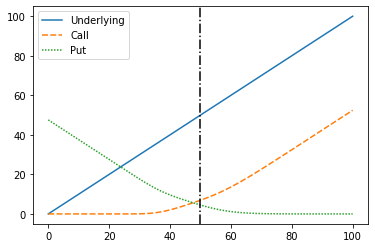

In [3]:
s = [i for i in range(0,101)]
c = [option(S = i, K = 50, r = 0.05, sigma = 0.3, ttm = 1, call_or_put = "call") for i in range(0,101)]
p = [option(S = i, K = 50, r = 0.05, sigma = 0.3, ttm = 1, call_or_put = "put") for i in range(0,101)]


df = pd.DataFrame(data = {'Underlying':s, 'Call':c, 'Put':p})
sns.lineplot(data = df)
plt.axvline(x = 50, ls = '-.', c = 'black')

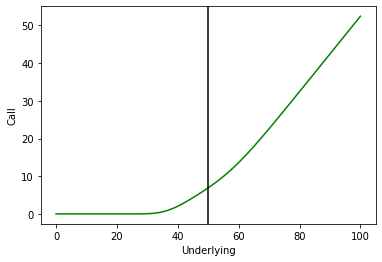

In [4]:
sns.lineplot(data = df, x = 'Underlying', y = 'Call', color = 'green')
plt.axvline(x = 50, ls = '-', c = 'black')

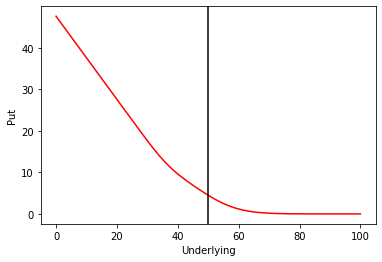

In [5]:
sns.lineplot(data = df, x = 'Underlying', y = 'Put', color = 'red')
plt.axvline(x = 50, ls = '-', c = 'black')

## <u>Option Price with respect to Strike

In [6]:
s = [i for i in range(1,101)]
k = [i for i in range(1,101)]
c = [option(S = 50, K = i, r = 0.05, sigma = 0.3, ttm = 1, call_or_put = "call") for i in range(1,101)]
p = [option(S = 50, K = i, r = 0.05, sigma = 0.3, ttm = 1, call_or_put = "put") for i in range(1,101)]

df = pd.DataFrame(data = {'Underlying':s,
                         'Strike':k,
                         'Call':c,
                         'Put':p})

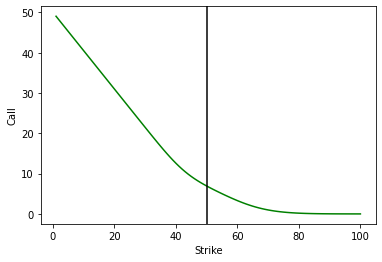

In [7]:
sns.lineplot(data = df, x = 'Strike', y = 'Call', color = 'green')
plt.axvline(x = 50, ls = '-', c = 'black')

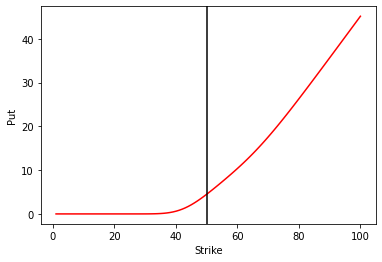

In [8]:
sns.lineplot(data = df, x = 'Strike', y = 'Put', color = 'red')
plt.axvline(x = 50, ls = '-', c = 'black')

## <u>Option Price with respect to Time to Maturity

In [9]:
t = np.linspace(start = 0, stop = 5, num = 100)
c = [option(S = 50, K = 50, r = 0.05, sigma = 0.30, ttm = t[i], call_or_put = "call") for i in range(0,len(t))]
p = [option(S = 50, K = 50, r = 0.05, sigma = 0.30, ttm = t[i], call_or_put = "put") for i in range(0,len(t))]

df = pd.DataFrame(data = {'T': t,
                         'Call': c,
                         'Put': p})

<AxesSubplot:xlabel='T', ylabel='Call'>

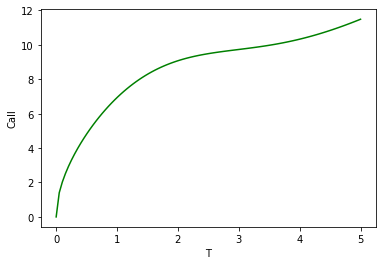

In [10]:
sns.lineplot(data = df, x = 'T', y = 'Call', color = 'green')

<AxesSubplot:xlabel='T', ylabel='Put'>

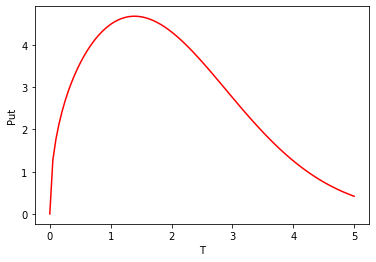

In [11]:
sns.lineplot(data = df, x = 'T', y = 'Put', color = 'red')

## <u>Option Price with respect to Volatility

In [12]:
vol = np.linspace(start = 0, stop = 1.5, num = 100)
c = [option(S = 50, K = 50, r = 0.05, ttm=1, sigma = vol[i], call_or_put = 'call') for i in range(0,len(vol))]
p = [option(S = 50, K = 50, r = 0.05, ttm=1, sigma = vol[i], call_or_put = 'put') for i in range(0,len(vol))]
df = pd.DataFrame(data = {'Volatility':vol,
                         'Call':c,
                         'Put':p})

<ipython-input-2-36c799fca0d5>:12: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + 0.5*(sigma**2)) * ttm) / (sigma * np.sqrt(sigma))


<AxesSubplot:xlabel='Volatility', ylabel='Call'>

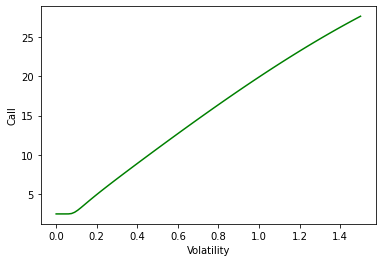

In [13]:
sns.lineplot(data = df, x = 'Volatility', y = 'Call', color = 'g')

<AxesSubplot:xlabel='Volatility', ylabel='Put'>

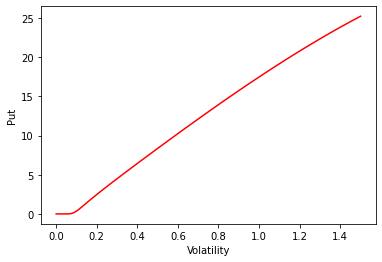

In [14]:
sns.lineplot(data = df, x = 'Volatility', y = 'Put', color = 'r')

## <u>Option Price with respect to the Risk Free Rate

In [15]:
rfr = np.linspace(0,0.2, num = 100)
c = [option(S = 50, K = 50, r = rfr[i], sigma = 0.3, ttm = 1, call_or_put = "call") for i in range(0,100)]
p = [option(S = 50, K = 50, r = rfr[i], sigma = 0.3, ttm = 1, call_or_put = "put") for i in range(0,100)]
df = pd.DataFrame(data = {'Risk Free Rate':rfr,
                         'Call':c,
                         'Put':p})


<AxesSubplot:xlabel='Risk Free Rate', ylabel='Call'>

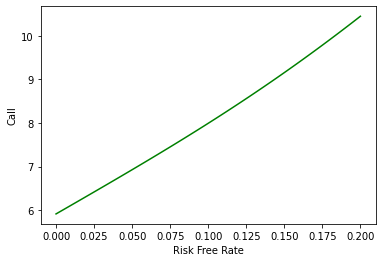

In [18]:
sns.lineplot(data = df, x = 'Risk Free Rate', y = 'Call', color = 'g')

<AxesSubplot:xlabel='Risk Free Rate', ylabel='Put'>

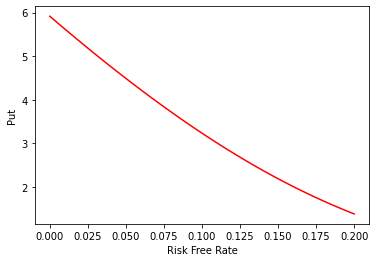

In [19]:
sns.lineplot(data = df, x = 'Risk Free Rate', y = 'Put', color = 'r')